<a href="https://colab.research.google.com/github/shengjiyang/DS-Unit-2-Linear-Models/blob/master/module1-regression-1/LS_DS_211_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

If your **Plotly** visualizations aren't working:
- You must have JavaScript enabled in your browser
- You probably want to use Chrome or Firefox
- You may need to turn off ad blockers
- [If you're using Jupyter Lab locally, you need to install some "extensions"](https://plot.ly/python/getting-started/#jupyterlab-support-python-35)

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

In [0]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version.
# Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [16]:
# Here I have used df.columns as opposed to df.head()
# because it reveals trailing spaces if they exist.

print(df.shape)
df.columns

(48818, 34)


Index(['bathrooms', 'bedrooms', 'created', 'description', 'display_address',
       'latitude', 'longitude', 'price', 'street_address', 'interest_level',
       'elevator', 'cats_allowed', 'hardwood_floors', 'dogs_allowed',
       'doorman', 'dishwasher', 'no_fee', 'laundry_in_building',
       'fitness_center', 'pre-war', 'laundry_in_unit', 'roof_deck',
       'outdoor_space', 'dining_room', 'high_speed_internet', 'balcony',
       'swimming_pool', 'new_construction', 'terrace', 'exclusive', 'loft',
       'garden_patio', 'wheelchair_access', 'common_outdoor_space'],
      dtype='object')

In [13]:
import plotly.express as px

# trendline = 'ols': Ordinary Least Squares
px.scatter(df, x = 'bedrooms', y = 'price', trendline = 'ols')

In [0]:
# Performing Linear Regression with a Single Feature:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

model = LinearRegression()

train, test = train_test_split(df.copy(), random_state = 0)

x_train = np.matrix(train['bedrooms'])
y_train = np.matrix(train['price'])

x_test = np.matrix(test['bedrooms'])
y_test = np.matrix(test['price'])

In [98]:
# In order to use model.fit() the data will need to be in 2D array format.

# Rich is the man or woman who undercuts scikit learn by writing the function library
# that allows one to do this without altering the Pandas DataFrame format.

x_train_col = train['bedrooms']
x_train_matrix = []

for i in x_train_col:
    x_train_matrix.append([i])
    
x_train = np.array(x_train_matrix)
print(len(x_train))
x_train

36613


array([[0],
       [1],
       [1],
       ...,
       [2],
       [0],
       [0]])

In [99]:
y_train_col = train['price']
y_train_matrix = []

for i in y_train_col:
    y_train_matrix.append([i])
    
y_train = np.array(y_train_matrix)
print(len(y_train))
y_train

36613


array([[2530],
       [3500],
       [2350],
       ...,
       [4885],
       [2950],
       [1850]])

In [100]:
x_test_col = test['bedrooms']
x_test_matrix = []

for i in x_test_col:
    x_test_matrix.append([i])
    
x_test = np.array(x_test_matrix)
print(len(x_test))

12205


In [101]:
y_test_col = test['price']
y_test_matrix = []

for i in y_test_col:
    y_test_matrix.append([i])
    
y_test = np.array(y_test_matrix)
print(len(y_test))

12205


In [105]:
model.fit(x_train, y_train)

# In a real situation, we'd likely use model.predict(x_test) as y_pred

def predict(bedrooms):
  y_pred = model.predict([[bedrooms]])
  estimate = y_pred[0]
  result = f'${round(estimate[0], 2)} estimated price for a {bedrooms} bedroom apartment in NYC.'
  return print(result)

coefficient = model.coef_[0]

print('Interpoation: \n')

for i in range(0, 7):
  predict(i)
  print('----------------------------------------------------------')

print('Explanation: ',
      f'In this model, each additional bedroom adds ${round(coefficient[0], 2)}.')

Interpoation: 

$2270.13 estimated price for a 0 bedroom apartment in NYC.
----------------------------------------------------------
$3119.03 estimated price for a 1 bedroom apartment in NYC.
----------------------------------------------------------
$3967.93 estimated price for a 2 bedroom apartment in NYC.
----------------------------------------------------------
$4816.83 estimated price for a 3 bedroom apartment in NYC.
----------------------------------------------------------
$5665.73 estimated price for a 4 bedroom apartment in NYC.
----------------------------------------------------------
$6514.63 estimated price for a 5 bedroom apartment in NYC.
----------------------------------------------------------
$7363.53 estimated price for a 6 bedroom apartment in NYC.
----------------------------------------------------------
Explanation:  In this model, each additional bedroom adds $848.9.


In [106]:
print('Extrapolation: \n')

for i in range(7, 13):
  predict(i)
  print('------------------------------------------------------------')

print('Explanation: ',
      f'In this model, each additional bedroom adds ${round(coefficient[0], 2)}.')

Extrapolation: 

$8212.43 estimated price for a 7 bedroom apartment in NYC.
------------------------------------------------------------
$9061.33 estimated price for a 8 bedroom apartment in NYC.
------------------------------------------------------------
$9910.23 estimated price for a 9 bedroom apartment in NYC.
------------------------------------------------------------
$10759.13 estimated price for a 10 bedroom apartment in NYC.
------------------------------------------------------------
$11608.03 estimated price for a 11 bedroom apartment in NYC.
------------------------------------------------------------
$12456.93 estimated price for a 12 bedroom apartment in NYC.
------------------------------------------------------------
Explanation:  In this model, each additional bedroom adds $848.9.


In [122]:
# Performing Linear Regression with Multiple Features:
# latitude and longitude

# First we visualize both variables against price individually in plotly
px.scatter(df, x = 'latitude', y = 'price', trendline = 'ols')

In [123]:
px.scatter(df, x = 'longitude', y = 'price', trendline = 'ols')

In [130]:
# Looking at the two graphs above, it appears that the closer a home is to a
# center, the higher the price of the home.

model_2 = LinearRegression()

features = ['latitude', 'longitude']
target = ['price']

X_train = df[features]
y_train = df[target]

model_2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
print(model_2.coef_)
print(model_2.intercept_)

[[  2347.99312608 -16356.12226422]]
[-1302010.40489941]


##### The model predicting price as a function of both latitude and longitude can be expressed by the equation:

$Price = 2347.99 * latitude - 16356.12 * longitude - 1302010.40$

array([[2999.53175498],
       [3583.65896249],
       [4026.50603821],
       ...,
       [3883.51604908],
       [4086.65647434],
       [2950.59999349]])

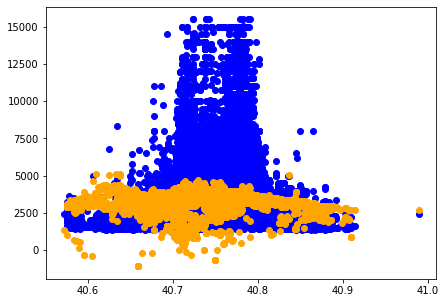

In [139]:
y_pred = model_2.predict(X_train)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (7, 5))
ax = plt.axes()


ax.scatter(x = df.latitude, y = df.price, color = 'blue')
ax.scatter(x = df.latitude, y = y_pred, color = 'orange')
plt.show()

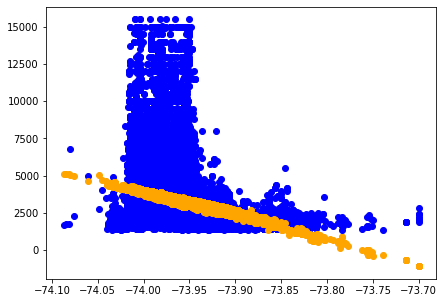

In [143]:
fig, ax = plt.subplots(figsize = (7, 5))
ax = plt.axes()

ax.scatter(x = df.longitude, y = df.price, color = 'blue')
ax.scatter(x = df.longitude, y = y_pred, color = 'orange')
plt.show()

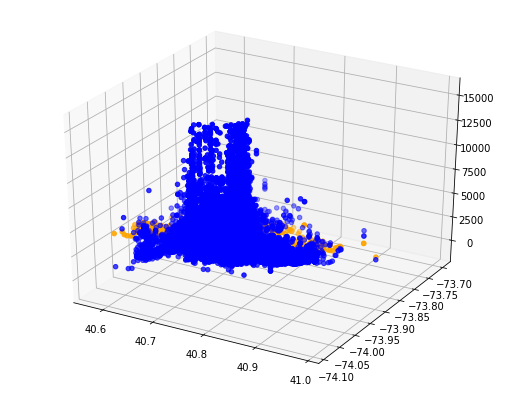

In [155]:
# Now to visualize the difference on a 3D Graph

fig, ax = plt.subplots(figsize = (9, 7))
ax = plt.axes(projection = '3d')

ax.scatter(df.latitude, df.longitude, y_pred, color = 'orange')
ax.scatter(df.latitude, df.longitude, df.price, color = 'blue')
plt.show()